### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
print("Target Column :-", set(train_df.columns)-set(test_df.columns))

Target Column :- {'SalePrice'}


In [5]:
print("Train, Test DataFrame Shape:-",train_df.shape, test_df.shape)
train_df.head()

Train, Test DataFrame Shape:- (1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
x = pd.concat([train_df.drop('SalePrice', axis=1, inplace=False),test_df], axis=0)
y = train_df[['SalePrice']]

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Visualization

In [9]:
num = x.select_dtypes(exclude='object').drop('MSSubClass', axis=1).copy()
num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
num.drop(columns=['Id'], inplace=True)

In [11]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

In [12]:
cont_num_var = []
for i in num.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

In [13]:
cat = x.select_dtypes(include='object').copy()
cat['MSSubClass'] = x['MSSubClass']
cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

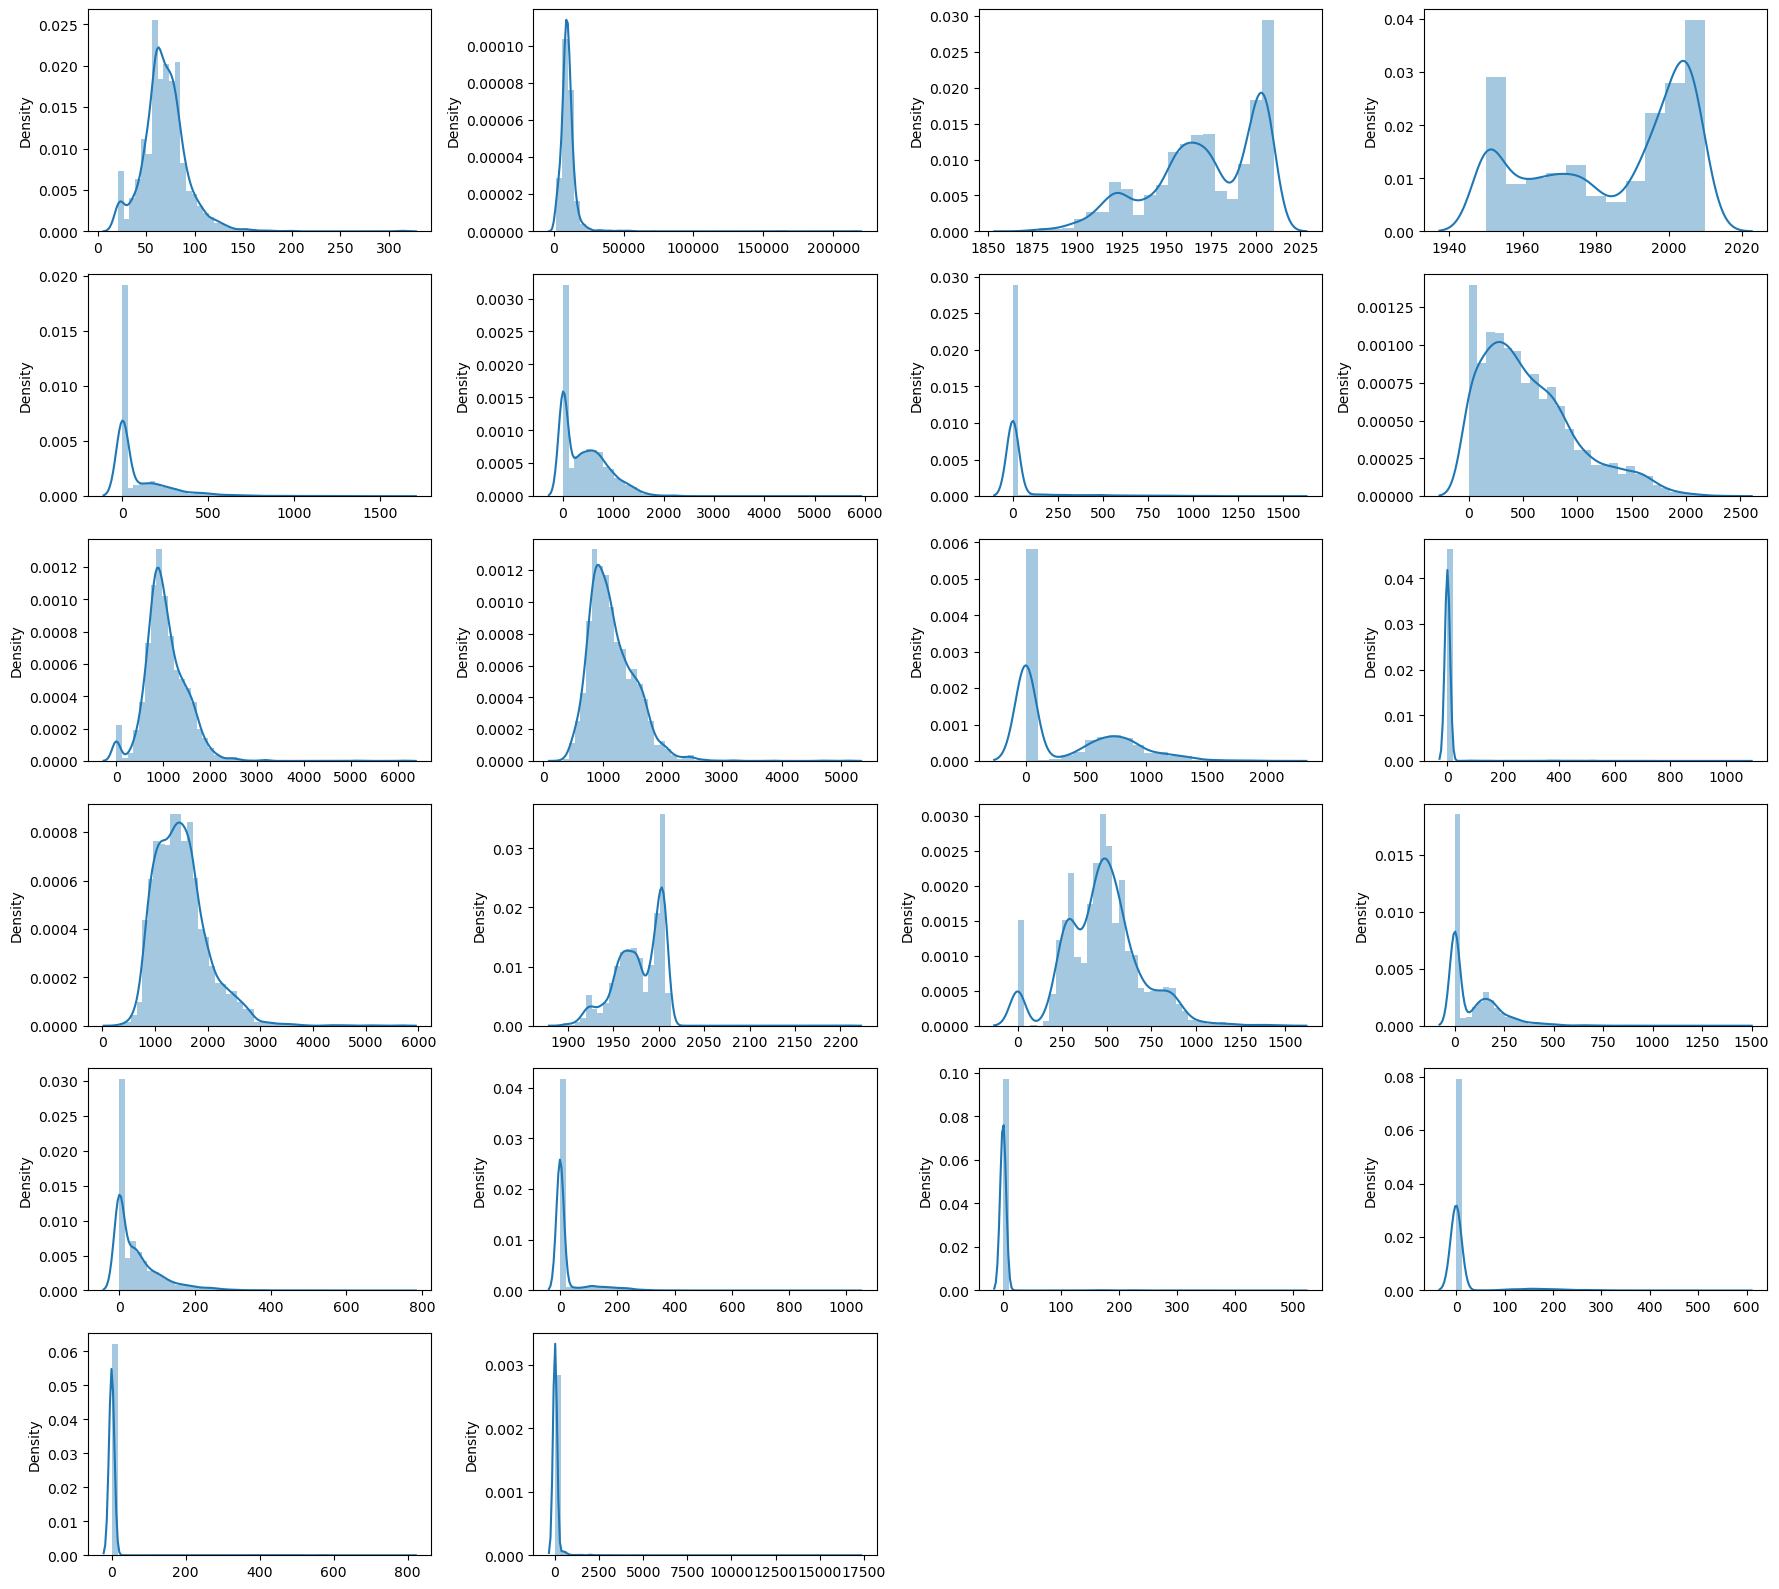

In [30]:
fig = plt.figure(figsize=(18,16))
for index, col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    # sns.distplot(num.loc[:,col].dropna(), kde=False)
    
    sns.distplot(x =num.loc[:,col].dropna(), kde=True)
    
fig.tight_layout()

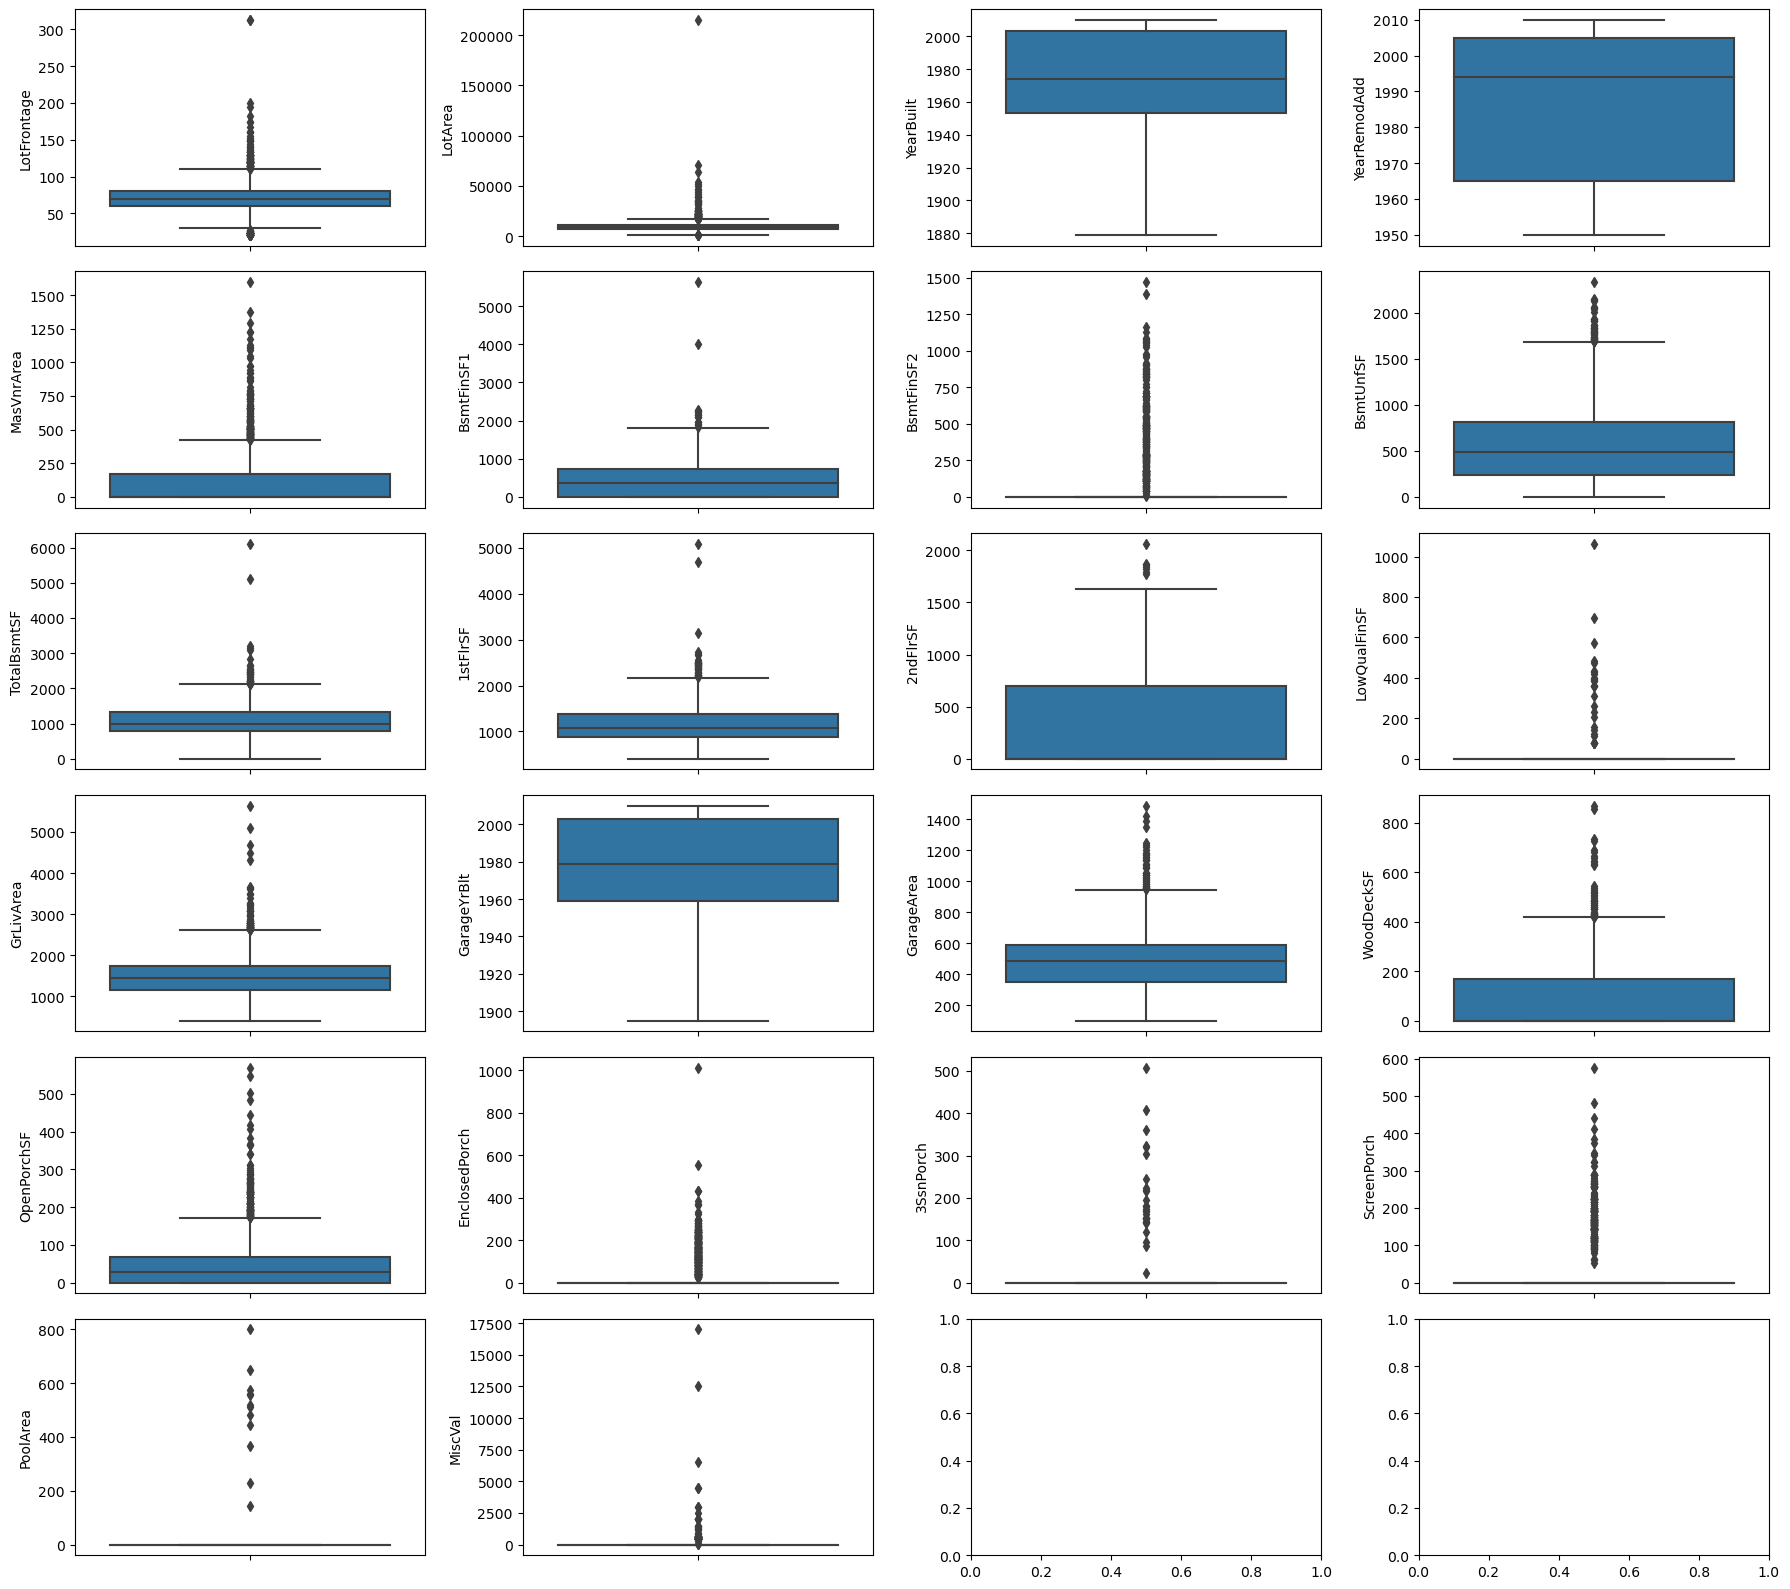

In [15]:
fig,ax = plt.subplots(ncols=4, nrows=6, figsize=(18,16))
ax = ax.flatten()
for i, col in enumerate(cont_num_var):
    sns.boxplot(y=col, data=num.dropna(), ax=ax[i])
    
fig.tight_layout()

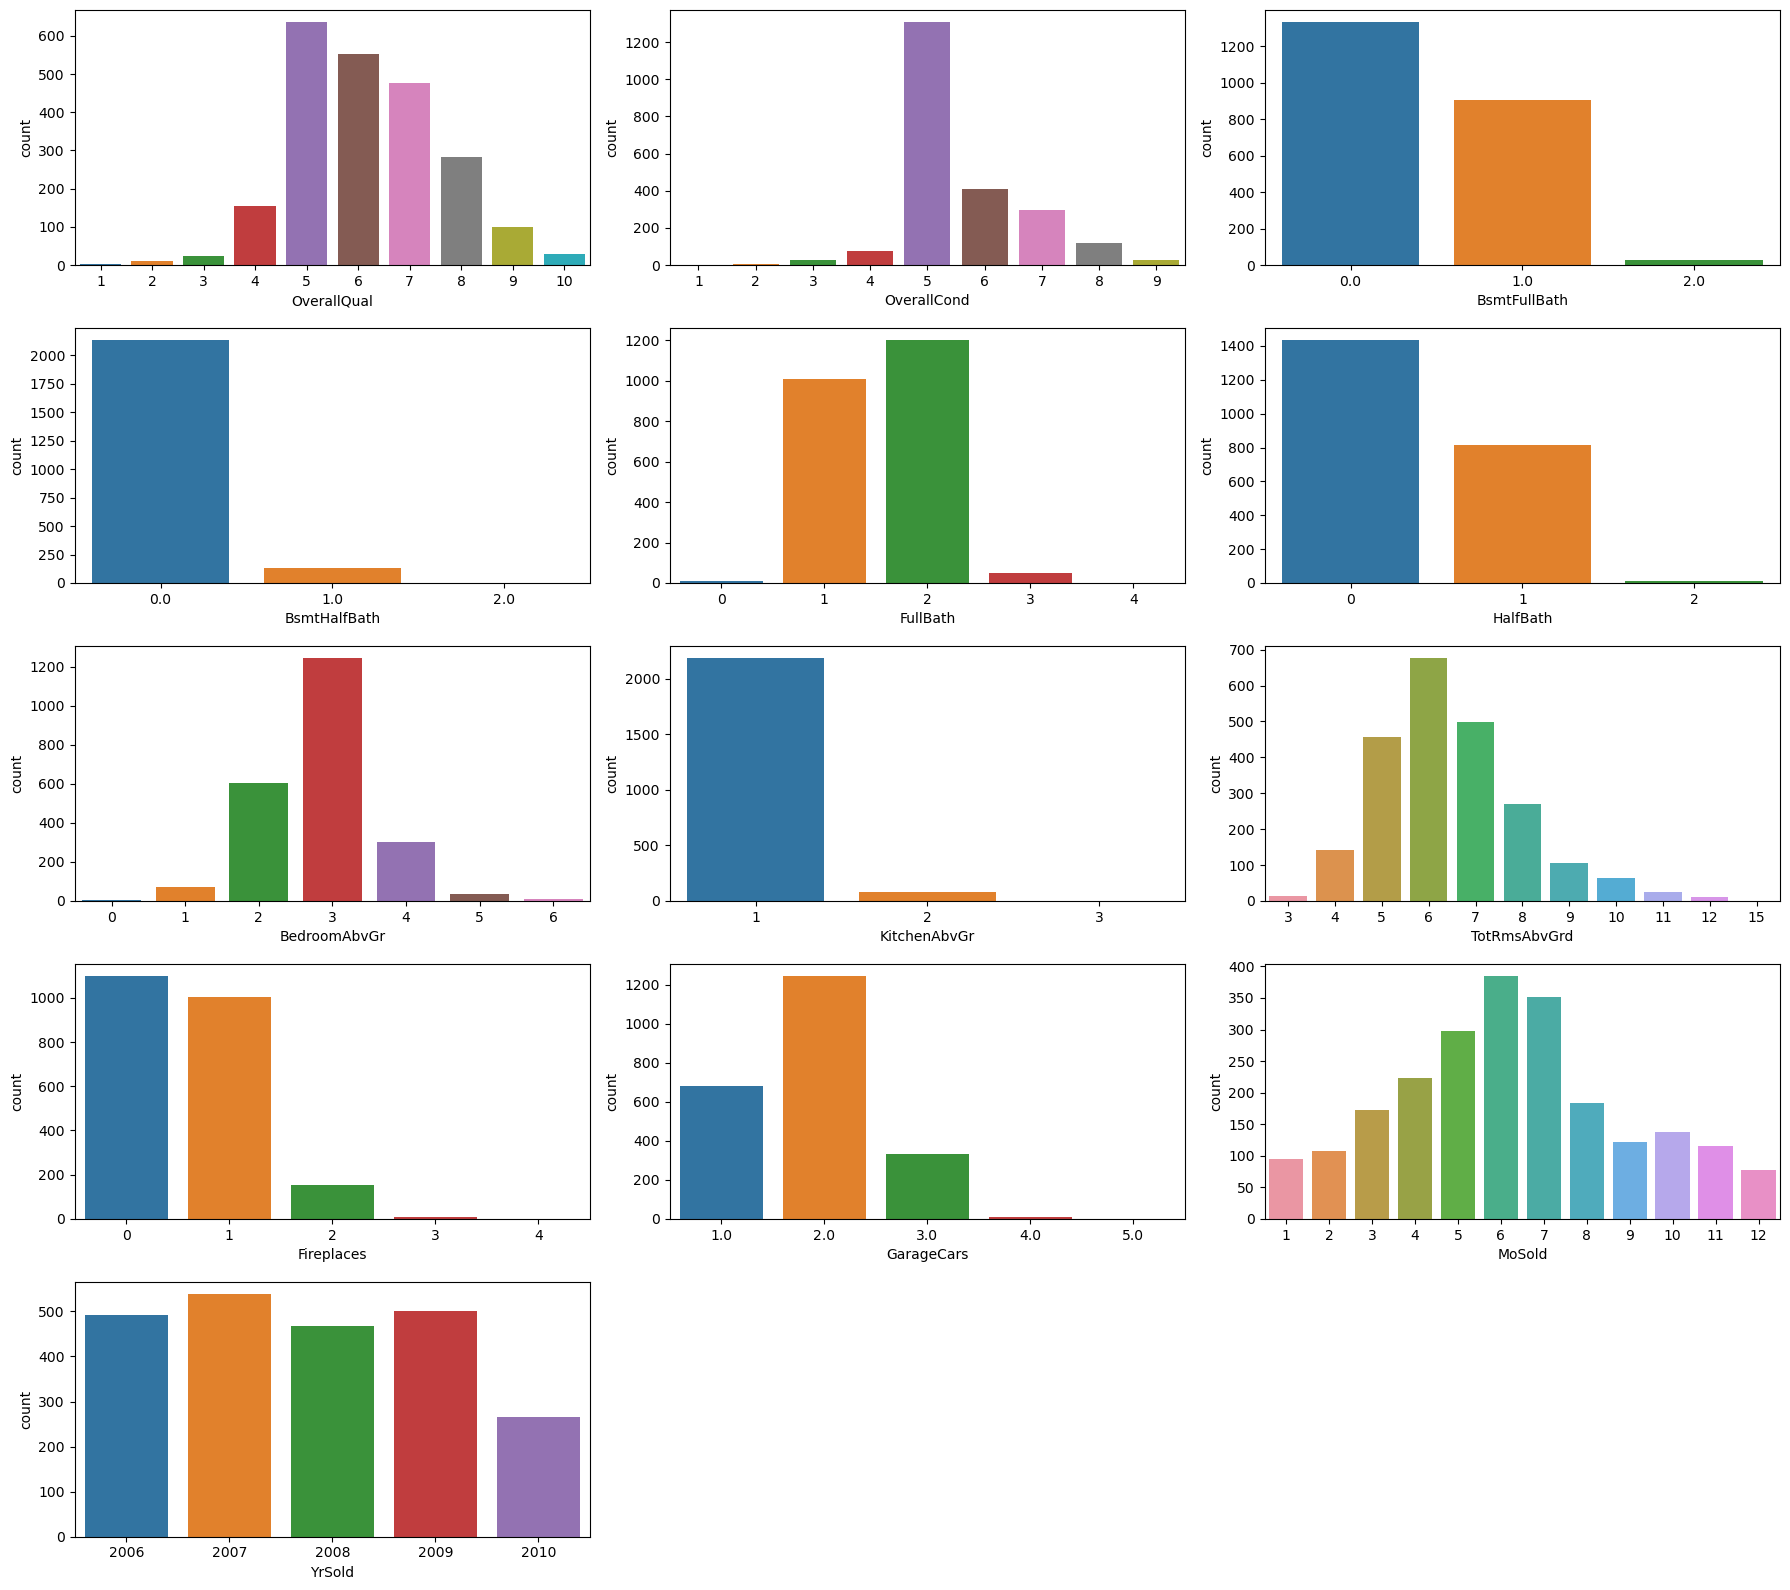

In [16]:
fig = plt.figure(figsize=(18,16))

for i,col in enumerate(disc_num_var):
    plt.subplot(5,3,i+1)
    sns.countplot(x=col, data=num.dropna())
    
fig.tight_layout()

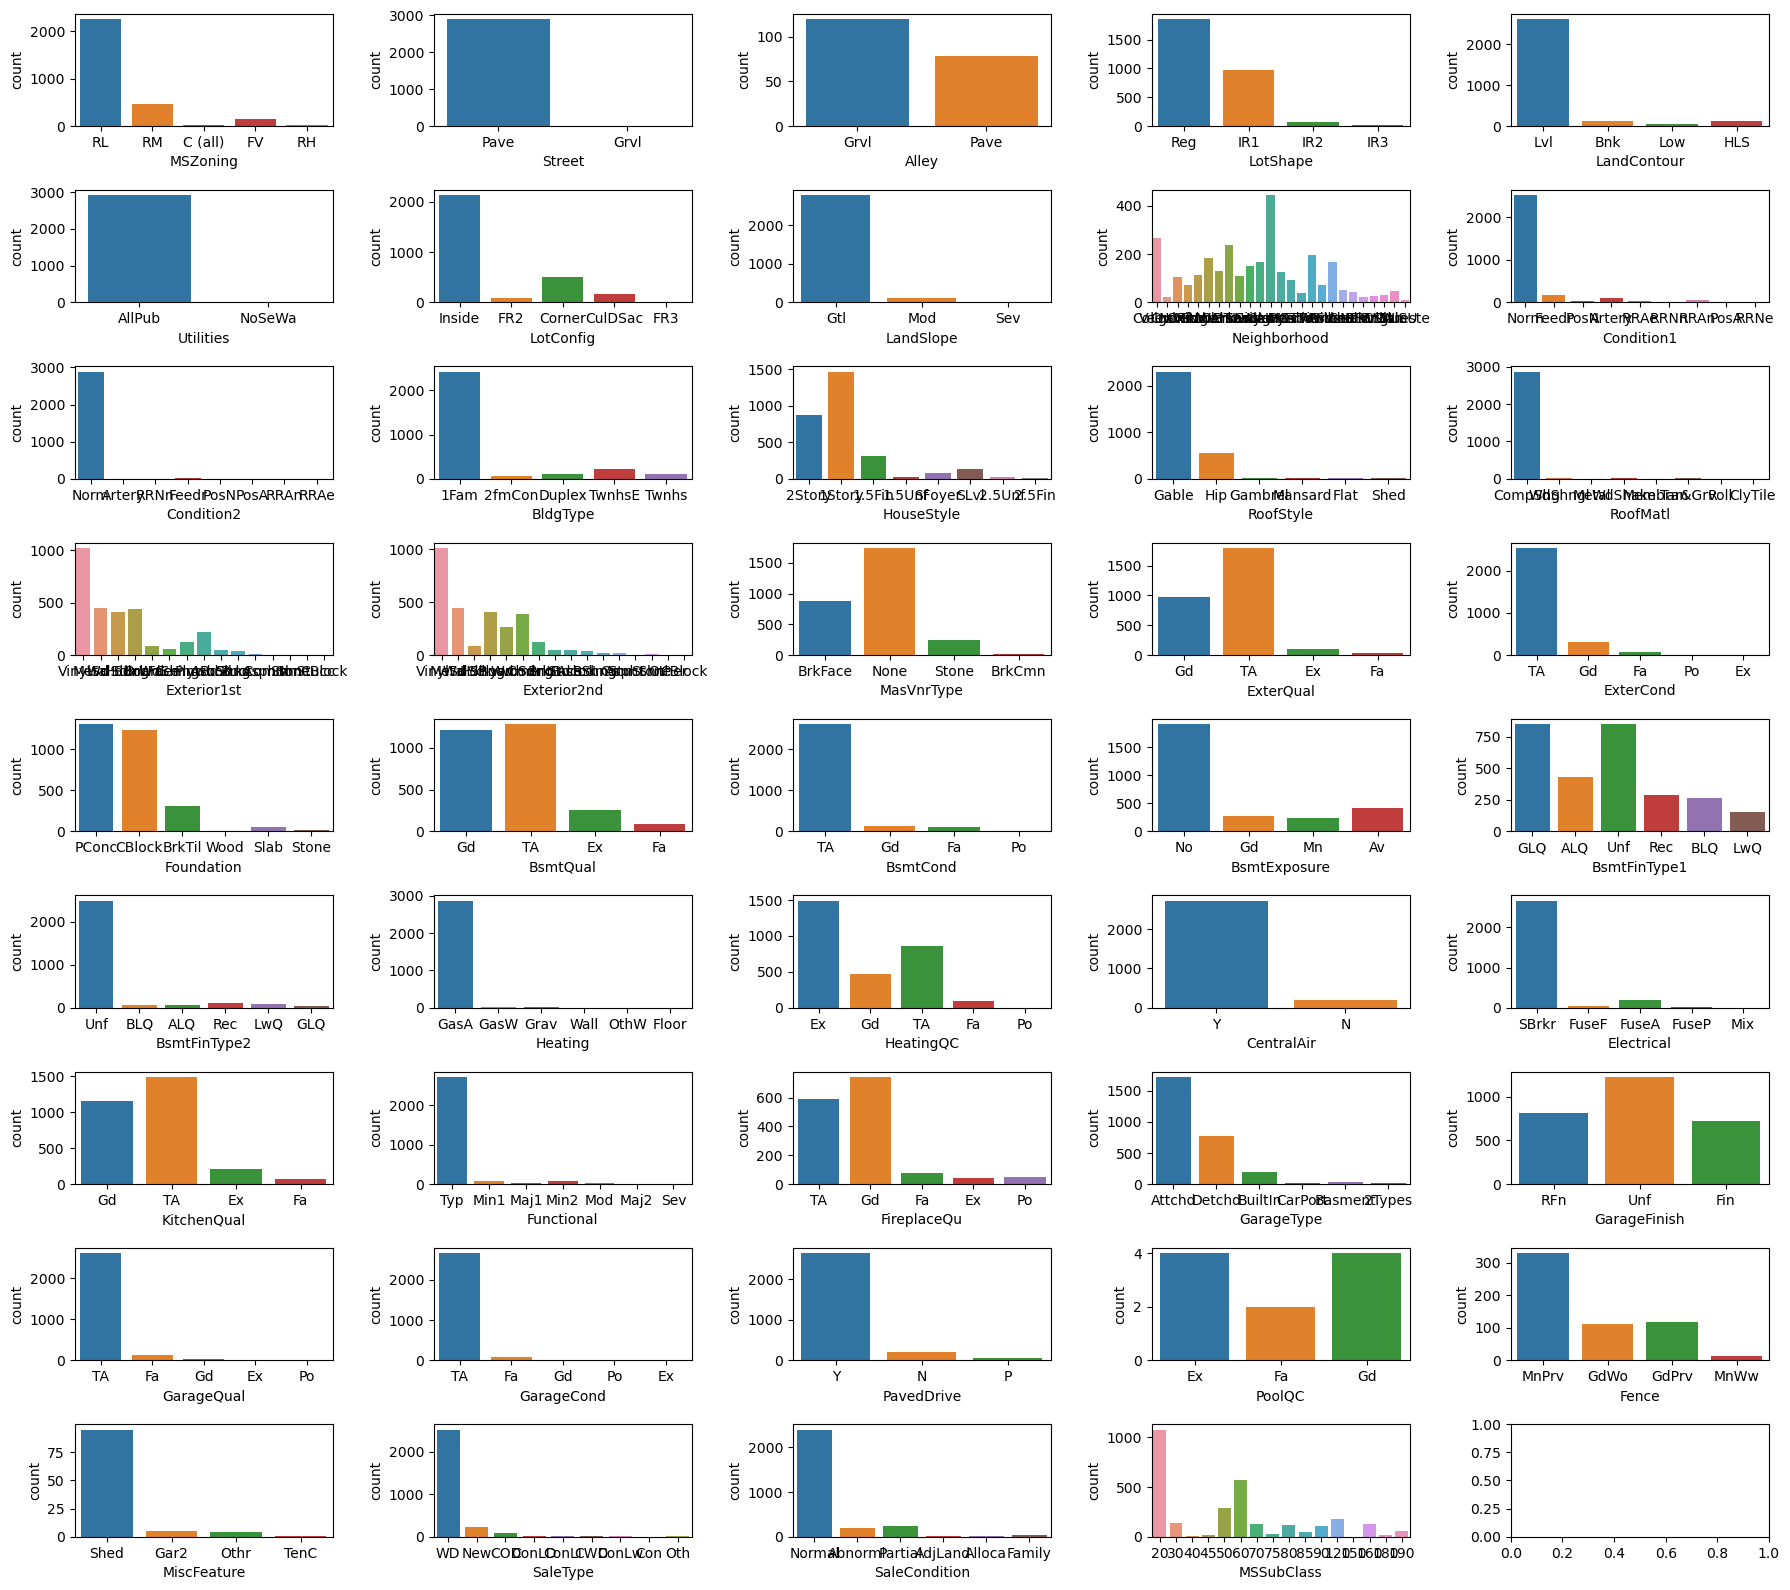

In [17]:
fig, ax = plt.subplots(ncols=5, nrows=9,figsize=(18,16))
ax = ax.flatten()

for i in range(len(cat.columns)):
    sns.countplot(x=cat.iloc[:,i], data=cat.dropna(), ax=ax[i])
    
fig.tight_layout()

### Bi-variate Analysis 

<Axes: >

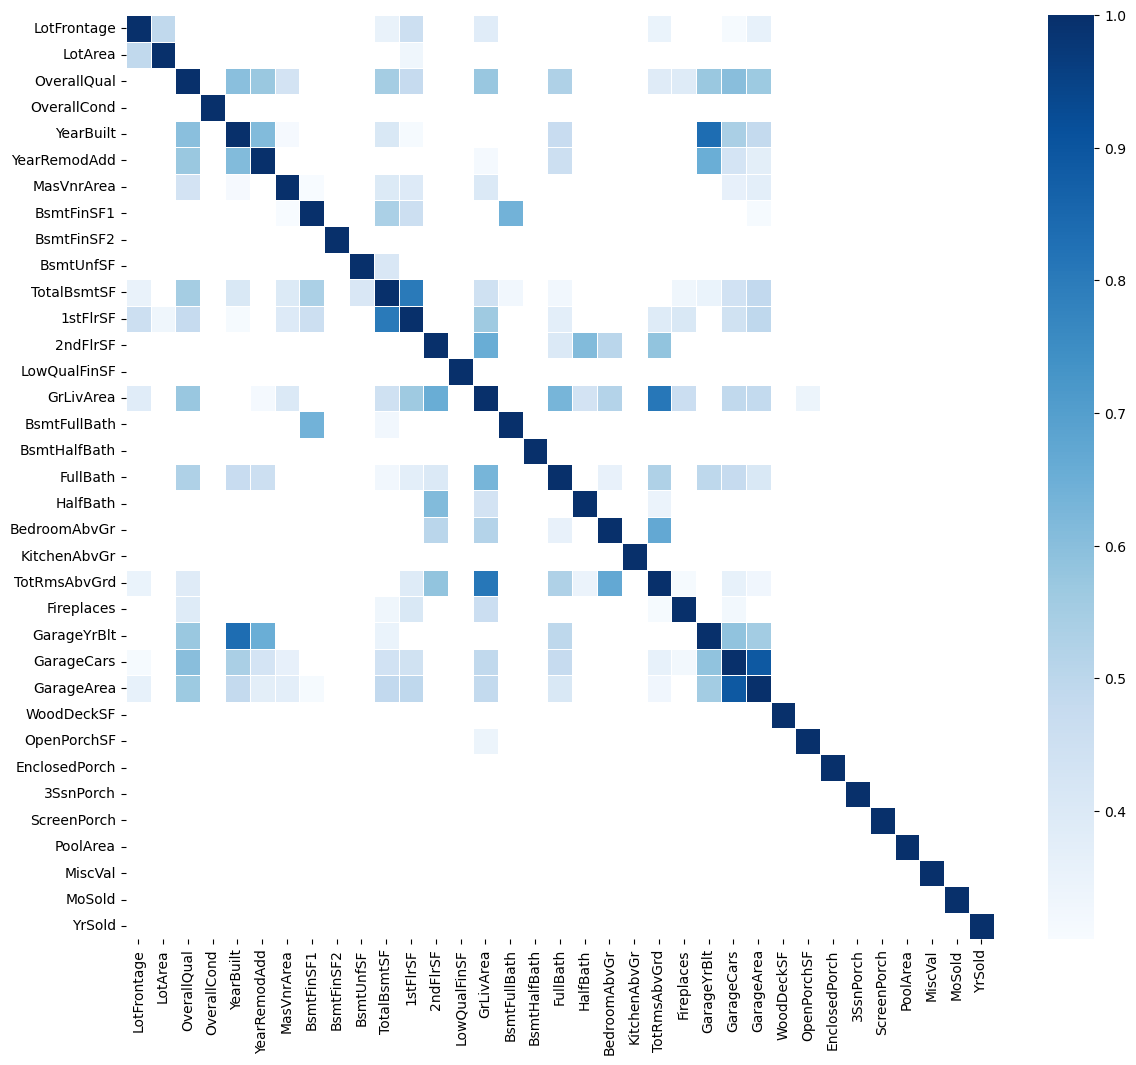

In [18]:
plt.figure(figsize=(14,12))
corr_num = num.corr()
sns.heatmap(corr_num, cmap='Blues', linewidths=0.5, mask=corr_num<0.3)

In [19]:
num_train = train_df.select_dtypes(exclude='object')
numcorr = num_train.corr()
numcorr[['SalePrice']].sort_values(['SalePrice'],ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


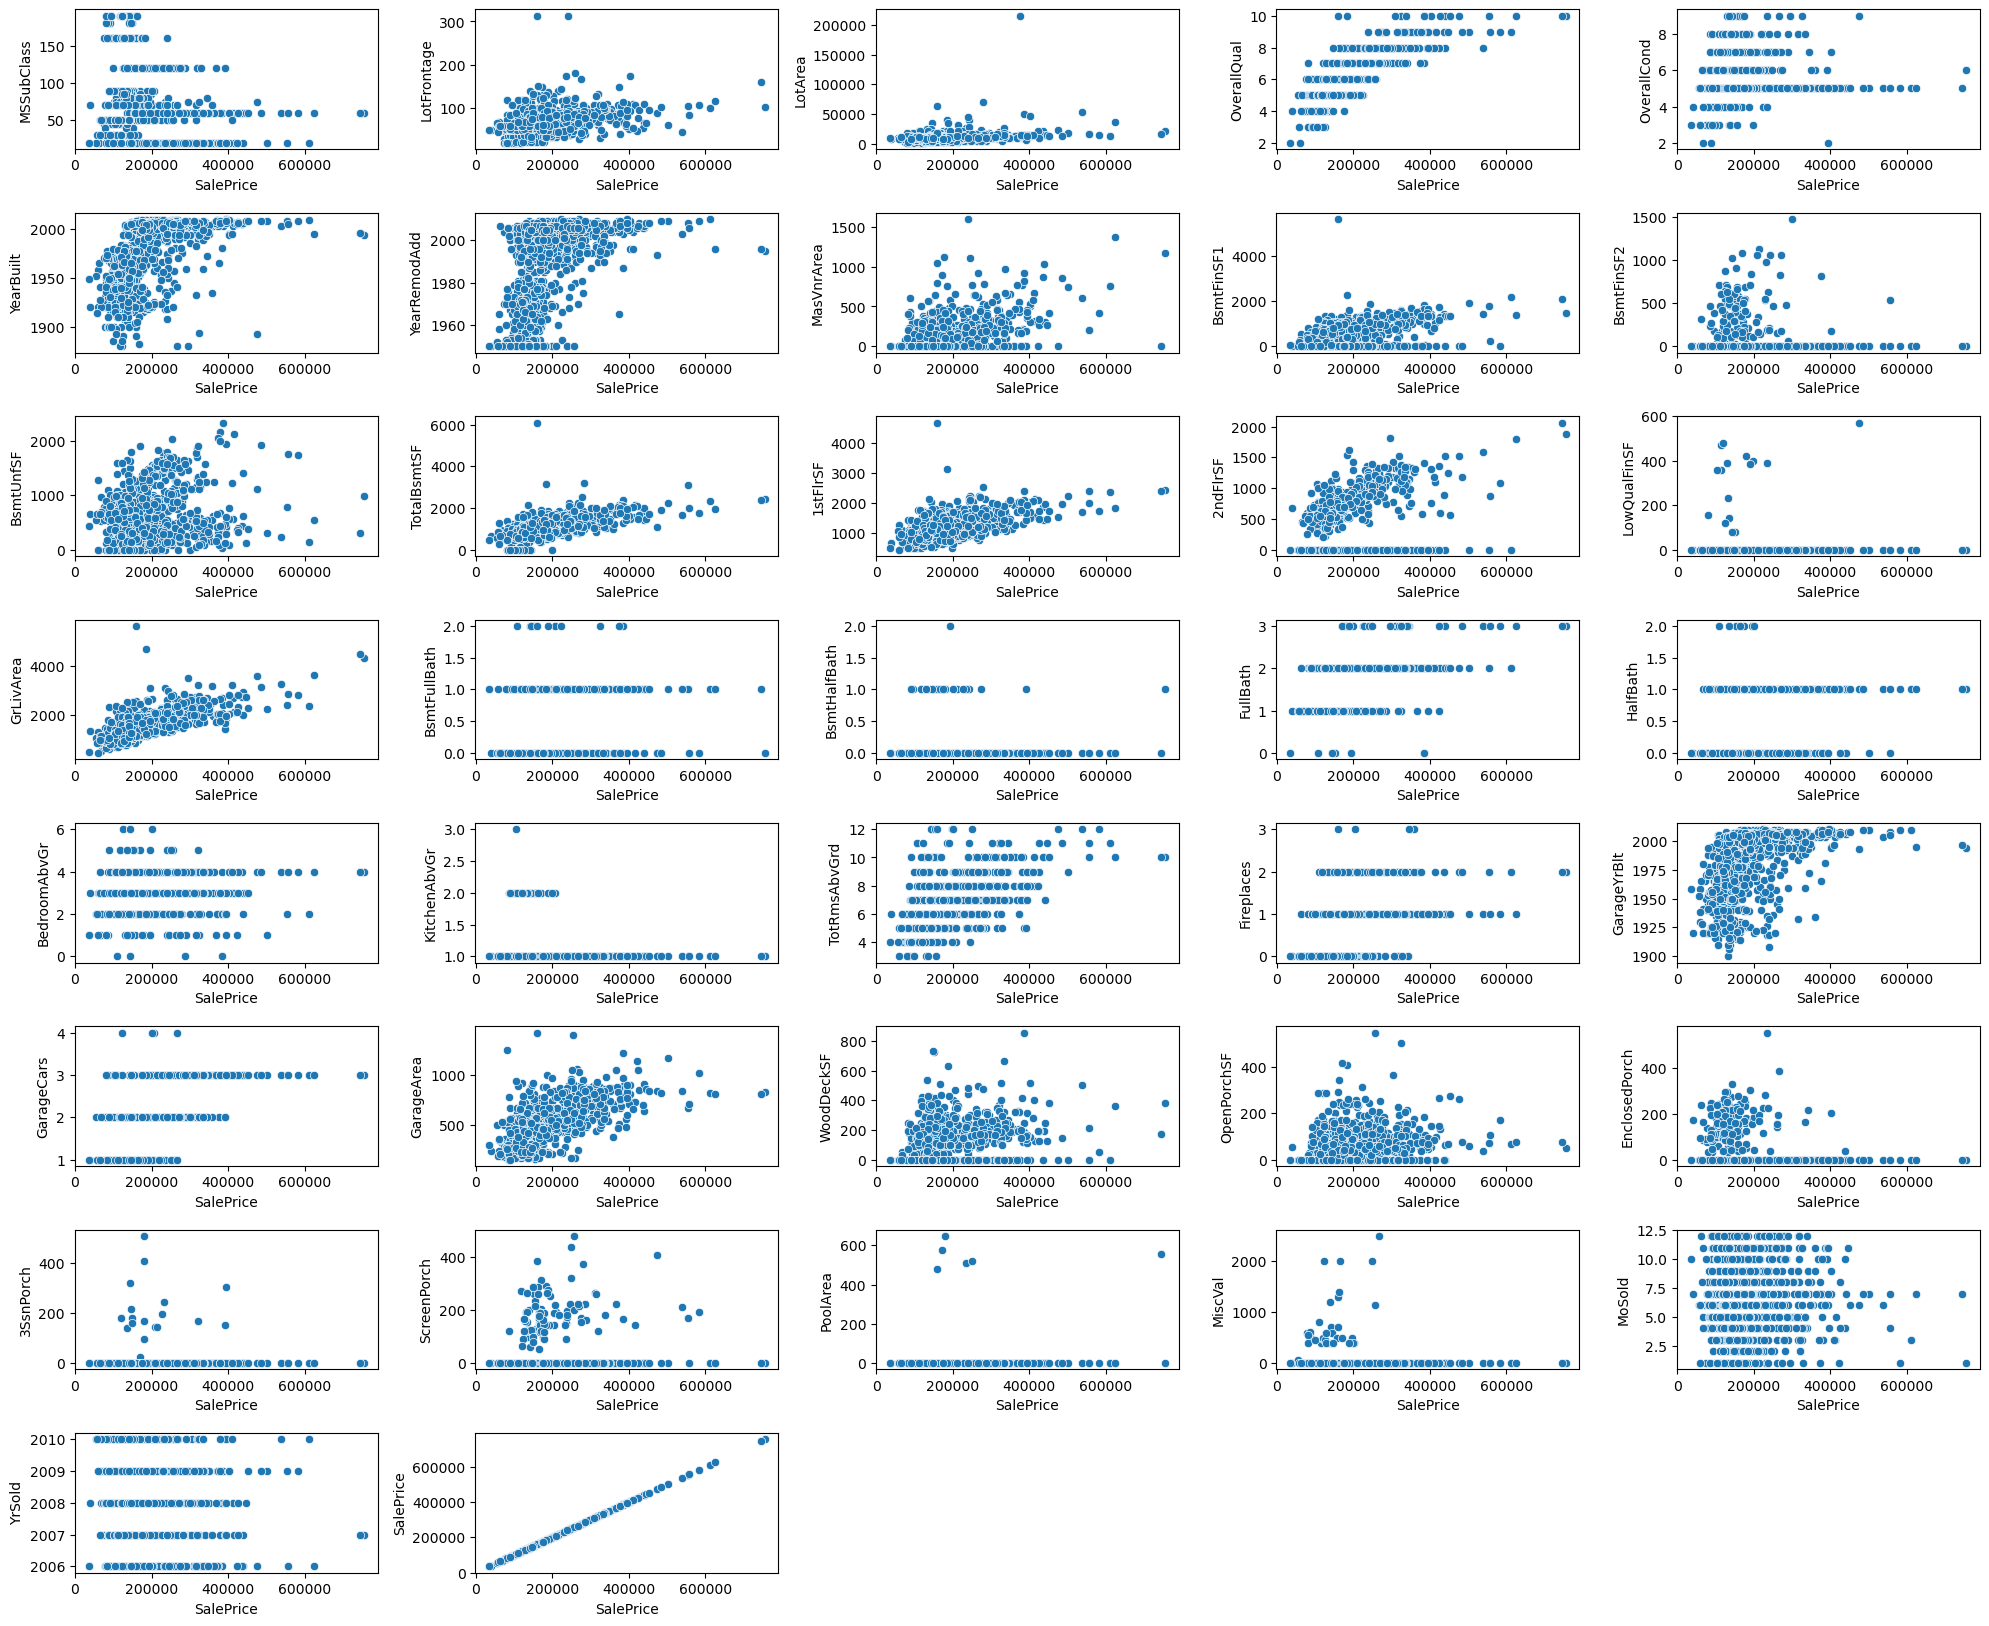

In [20]:
fig = plt.figure(figsize=(20,20))

for i in range(len(num_train.drop(columns=['Id'], axis=1, inplace=False).columns)):
    plt.subplot(10,5,i+1)
    sns.scatterplot(x='SalePrice', y=num_train.iloc[:,i+1], data=num_train.dropna())
    
fig.tight_layout()

### Data Preprocessing

#### Removing Redundant Data

In [21]:
x.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd','1stFlrSF','GarageCars'],axis=1, inplace=True)

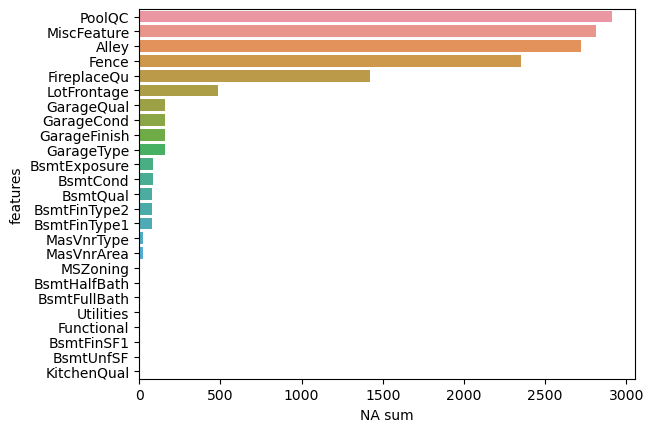

In [22]:
missing_cols = pd.DataFrame(x.isna().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(25).reset_index()
missing_cols.columns = ['features','sum']
sns.barplot(x='sum',y='features',data=missing_cols)
plt.xlabel('NA sum')
plt.show()

In [23]:
x.drop(columns=['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

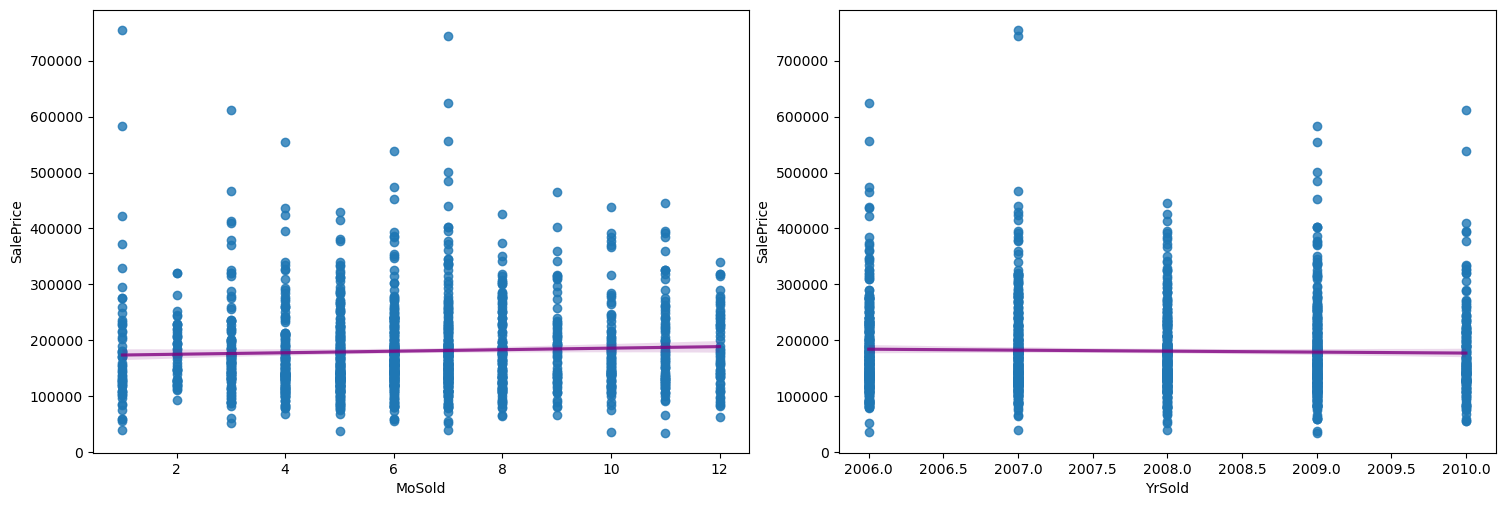

In [24]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='MoSold',y='SalePrice',data=num_train, ax=ax[0],line_kws={'color':'purple', 'alpha':0.8})
sns.regplot(x='YrSold',y='SalePrice',data=num_train, ax=ax[1],line_kws={'color':'purple','alpha':0.8})
fig.tight_layout(pad=0.5)

In [25]:
numcorr[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

,SalePrice
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
Id,-0.021917
LowQualFinSF,-0.025606
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


In [26]:
x.drop(['MoSold','YrSold'], axis=1, inplace=True)

In [34]:
cat_cols = x.select_dtypes(include='object').columns
overfit_catcols = []
for col in cat_cols:
    top_count = x[col].value_counts().iloc[0]
    if top_count/len(x) > .96:
        overfit_catcols.append(col)
        
overfit_catcols

x = x.drop(overfit_catcols,axis=1)

In [35]:
num_cols = x.select_dtypes(exclude='object').columns
overfit_numcols=[]
for col in num_cols:
    top_count = x[col].value_counts().iloc[0]
    if top_count/len(x) > .96:
        overfit_numcols.append(col)
        
overfit_numcols
x = x.drop(overfit_numcols, axis=1)

In [36]:
print("Overfitted Category Columns :-",overfit_catcols,"\nOverfitted Numerical Columns :-",overfit_numcols)

Overfitted Category Columns :- ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'] 
Overfitted Numerical Columns :- ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


#### Dealing with outliers

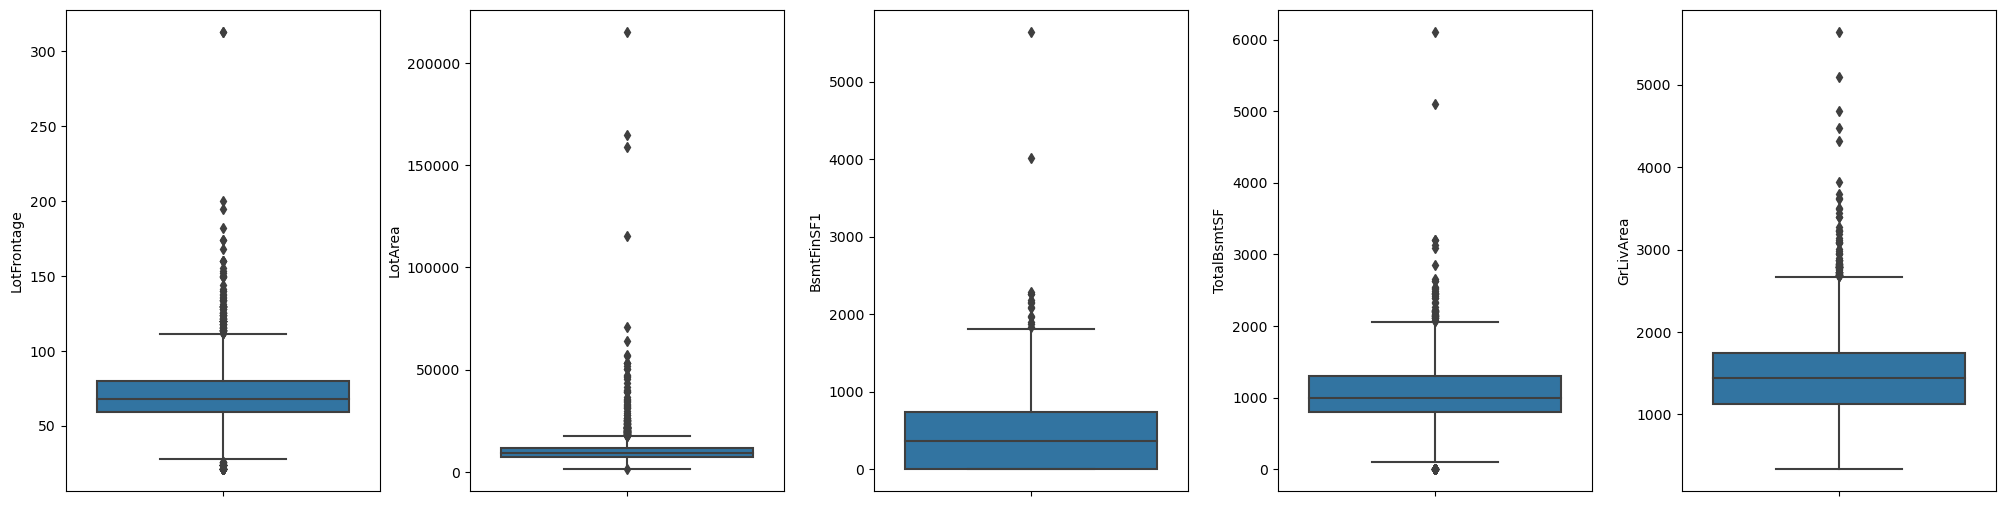

In [37]:
outliers_cols = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for i,col in enumerate(outliers_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=col, data=x)
fig.tight_layout(pad=0.5)

In [41]:
train_df = train_df.drop(train_df[train_df['LotFrontage']>230].index)
train_df = train_df.drop(train_df[train_df['LotArea']>10000].index)
train_df = train_df.drop(train_df[train_df['BsmtFinSF1']>4000].index)
train_df = train_df.drop(train_df[train_df['TotalBsmtSF']>5000].index)
train_df = train_df.drop(train_df[train_df['GrLivArea']>4000].index)

In [42]:
train_df.shape

(842, 81)

In [43]:
x.shape

(2919, 62)

#### Filling Missing Value

In [44]:
pd.DataFrame(x.isnull().sum(), columns=['nulls']).sort_values(by=['nulls'],ascending=False).head(15)

,nulls
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtCond,82
BsmtExposure,82
BsmtQual,81


In [ ]:
null_cats = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

x[cat] = x[cat].fillna